# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
# Building the URL
url = "http://api.openweathermap.org/data/2.5/weather?"
appid = weather_api_key
units = "metric"
url = f"{url}appid={appid}&units={units}&q="

# Creating a list for storing information
city_info = []

# Print begin
print("Beginning Data Retrieval\n-----------------------------")

# Auxiliary counters
record_count = 1
set_count = 1

# For loop
for i, city in enumerate(cities):
        
    # Dividing in sets of 50 as the given example
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Generating a unique URL for each city
    city_url = url + city

    # Recording the cities, URL and summing the aux counters
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    record_count += 1

    # API request for each city
    try:
        city_weather = requests.get(city_url).json()

        # Retrieving data
        city_latitute = city_weather["coord"]["lat"]
        city_longitude = city_weather["coord"]["lon"]
        city_max_temperature = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the retrieved information into city_info
        city_info.append({"City": city, 
                          "Lat": city_latitute, 
                          "Lng": city_longitude, 
                          "Max Temp": city_max_temperature,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # Exception for a not found value
    except:
        print("City not found. Skipping...")
        pass
              
# Print ends
print("-----------------------------\nData Retrieval Complete\n-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | tena
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | inhambane
Processing Record 5 of Set 1 | carnarvon
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | constitucion
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | santa maria
Processing Record 13 of Set 1 | oxford
Processing Record 14 of Set 1 | fort nelson
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | namibe
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | nguiu
City not found. Skipping...
Processing Record 20 of Set 1 | port hardy
Processing Record 21 of Set 1 | vardo
Processing Record 22 of Set 1 | cape town
Processing Rec

Processing Record 41 of Set 4 | mabaruma
Processing Record 42 of Set 4 | west bay
Processing Record 43 of Set 4 | jatai
Processing Record 44 of Set 4 | mahebourg
Processing Record 45 of Set 4 | new norfolk
Processing Record 46 of Set 4 | san patricio
Processing Record 47 of Set 4 | sambava
Processing Record 48 of Set 4 | bend
Processing Record 49 of Set 4 | gemena
Processing Record 0 of Set 5 | tubruq
City not found. Skipping...
Processing Record 1 of Set 5 | victoria
Processing Record 2 of Set 5 | urucara
Processing Record 3 of Set 5 | montepuez
Processing Record 4 of Set 5 | bantry
Processing Record 5 of Set 5 | marv dasht
City not found. Skipping...
Processing Record 6 of Set 5 | bubaque
Processing Record 7 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 8 of Set 5 | kisesa
Processing Record 9 of Set 5 | port blair
Processing Record 10 of Set 5 | buraydah
Processing Record 11 of Set 5 | qaqortoq
Processing Record 12 of Set 5 | buchanan
Processing Record 13 of Set 5

Processing Record 34 of Set 8 | aksu
Processing Record 35 of Set 8 | agucadoura
Processing Record 36 of Set 8 | bambari
Processing Record 37 of Set 8 | mogadishu
Processing Record 38 of Set 8 | nanortalik
Processing Record 39 of Set 8 | talara
Processing Record 40 of Set 8 | kayerkan
Processing Record 41 of Set 8 | turkistan
Processing Record 42 of Set 8 | kincardine
Processing Record 43 of Set 8 | swan hill
Processing Record 44 of Set 8 | sorong
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | xinmin
Processing Record 47 of Set 8 | sept-iles
Processing Record 48 of Set 8 | iwanai
Processing Record 49 of Set 8 | machiques
Processing Record 0 of Set 9 | waipawa
Processing Record 1 of Set 9 | ust-uda
Processing Record 2 of Set 9 | ahuimanu
Processing Record 3 of Set 9 | zacatepec
Processing Record 4 of Set 9 | wanning
Processing Record 5 of Set 9 | ranghulu
Processing Record 6 of Set 9 | oranjemund
Processing Record 7 of Set 9 | sak

City not found. Skipping...
Processing Record 19 of Set 12 | harbin
Processing Record 20 of Set 12 | dinsor
City not found. Skipping...
Processing Record 21 of Set 12 | tomatlan
Processing Record 22 of Set 12 | havoysund
Processing Record 23 of Set 12 | liepaja
Processing Record 24 of Set 12 | tongzi
Processing Record 25 of Set 12 | bell ville
Processing Record 26 of Set 12 | sterling
Processing Record 27 of Set 12 | qatana
Processing Record 28 of Set 12 | okha
Processing Record 29 of Set 12 | luwuk
Processing Record 30 of Set 12 | la huerta
Processing Record 31 of Set 12 | begun
Processing Record 32 of Set 12 | roches noires
City not found. Skipping...
Processing Record 33 of Set 12 | esmeralda
Processing Record 34 of Set 12 | solnechnyy
Processing Record 35 of Set 12 | laguna
Processing Record 36 of Set 12 | college station
Processing Record 37 of Set 12 | bandarbeyla
Processing Record 38 of Set 12 | acari
Processing Record 39 of Set 12 | skalistyy
City not found. Skipping...
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
# Converting the raw data into a data frame
city_info_df = pd.DataFrame(city_info)

# Export data frameinto a csv
city_info_df.to_csv("WeatherPy.csv",encoding="utf-8",index=False)

city_info_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tena,-0.9833,-77.8167,24.00,94,90,1.03,EC,1613159042
1,hobart,-42.8794,147.3294,14.00,72,20,3.09,AU,1613158820
2,bredasdorp,-34.5322,20.0403,22.00,73,0,3.09,ZA,1613159043
3,inhambane,-23.8650,35.3833,26.42,86,75,5.42,MZ,1613159043
4,carnarvon,-24.8667,113.6333,24.00,100,14,4.12,AU,1613159043


In [15]:
stats_summary_df = city_info_df.agg(["count", "mean", "std", "min", "max"])
stats_summary_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
count,564,564.000000,564.000000,564.000000,564.000000,564.000000,564.00000,564,5.640000e+02
min,abalak,-54.800000,-179.166700,-36.730000,11.000000,0.000000,0.06000,AL,1.613158e+09
max,zhigansk,78.218600,179.316700,37.000000,100.000000,100.000000,15.95000,ZW,1.613159e+09
mean,NaN,19.957745,13.325648,10.263599,72.453901,53.498227,3.78305,NaN,1.613159e+09
std,NaN,32.693836,91.488383,18.477580,19.995728,39.602667,2.74462,NaN,9.051901e+01


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
max_humidity_value = stats_summary_df.iat[2,4]
max_humidity_value

100.0

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

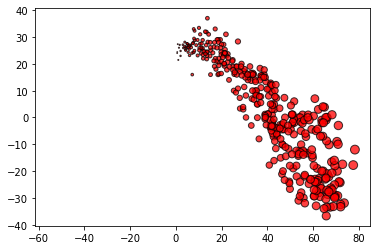

In [38]:
# Scatter plot for Latitude vs. Temperature
plt.scatter(city_info_df["Lat"], city_info_df["Max Temp"], marker="o", facecolors="red", edgecolors="black", s=city_info_df["Lat"], alpha=0.75)
plt.show()

#plt.title("Latitude vs. Temperature"
#plt.xlabel("Latitude")
#plt.ylabel("Max Temperature")
#plt.show()

#For some reason, it won't run if I try to add title, xlabel or ylabel.... "SyntaxError: invalid syntax"

## Latitude vs. Humidity Plot

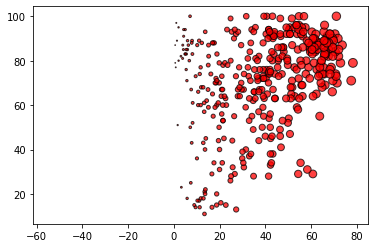

In [41]:
# Scatter plot for Latitude vs. Humidity
plt.scatter(city_info_df["Lat"], city_info_df["Humidity"], marker="o", facecolors="red", edgecolors="black", s=city_info_df["Lat"], alpha=0.75)
plt.show()

## Latitude vs. Cloudiness Plot

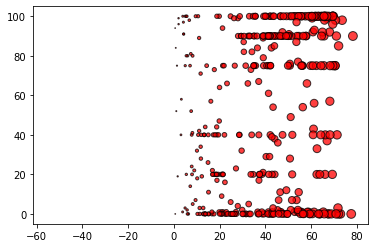

In [42]:
# Scatter plot for Latitude vs. Cloudiness
plt.scatter(city_info_df["Lat"], city_info_df["Cloudiness"], marker="o", facecolors="red", edgecolors="black", s=city_info_df["Lat"], alpha=0.75)
plt.show()

## Latitude vs. Wind Speed Plot

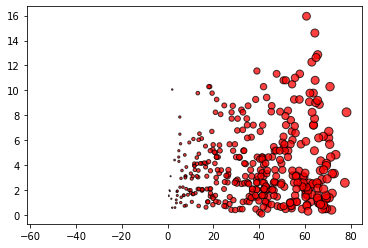

In [43]:
# Scatter plot for Latitude vs. Cloudiness
plt.scatter(city_info_df["Lat"], city_info_df["Wind Speed"], marker="o", facecolors="red", edgecolors="black", s=city_info_df["Lat"], alpha=0.75)
plt.show()

## Linear Regression

In [54]:
# Generating different data frames for each Hemisphere
north_hem = city_info_df.loc[city_info_df.Lat > 0]
south_hem = city_info_df.loc[city_info_df.Lat <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

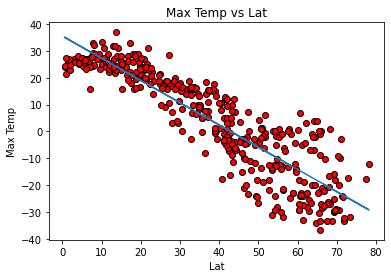

In [52]:
# Linear regression for Latitude vs. Temperature in Northern Hemisphere
x_axis = north_hem.groupby(north_hem["City"])["Lat"].mean()
y_axis = north_hem.groupby(north_hem["City"])["Max Temp"].mean()

slope, int, r, p, std_err = st.linregress(x_axis, y_axis)
      
fit = slope * x_axis + int

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black")
plt.title("Max Temp vs Lat")
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.plot(x_axis,fit,"-")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

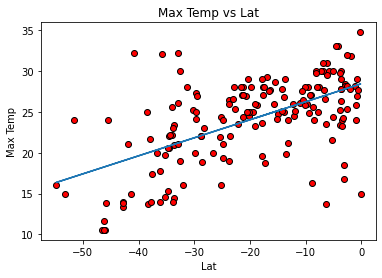

In [55]:
# Linear regression for Latitude vs. Temperature in Southern Hemisphere
x_axis = south_hem.groupby(south_hem["City"])["Lat"].mean()
y_axis = south_hem.groupby(south_hem["City"])["Max Temp"].mean()

slope, int, r, p, std_err = st.linregress(x_axis, y_axis)
      
fit = slope * x_axis + int

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black")
plt.title("Max Temp vs Lat")
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.plot(x_axis,fit,"-")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

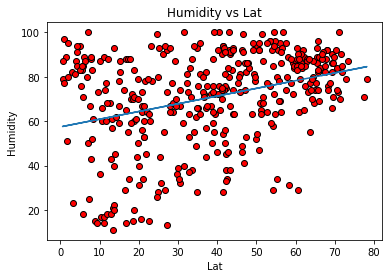

In [56]:
# Linear regression for Latitude vs. Humidity in Northern Hemisphere
x_axis = north_hem.groupby(north_hem["City"])["Lat"].mean()
y_axis = north_hem.groupby(north_hem["City"])["Humidity"].mean()

slope, int, r, p, std_err = st.linregress(x_axis, y_axis)
      
fit = slope * x_axis + int

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black")
plt.title("Humidity vs Lat")
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.plot(x_axis,fit,"-")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

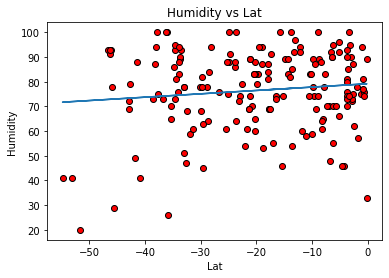

In [57]:
# Linear regression for Latitude vs. Humidity in Southern Hemisphere
x_axis = south_hem.groupby(south_hem["City"])["Lat"].mean()
y_axis = south_hem.groupby(south_hem["City"])["Humidity"].mean()

slope, int, r, p, std_err = st.linregress(x_axis, y_axis)
      
fit = slope * x_axis + int

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black")
plt.title("Humidity vs Lat")
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.plot(x_axis,fit,"-")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

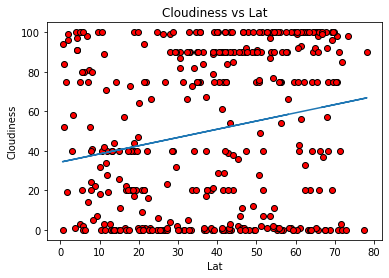

In [58]:
# Linear regression for Latitude vs. Cloudiness in Northern Hemisphere
x_axis = north_hem.groupby(north_hem["City"])["Lat"].mean()
y_axis = north_hem.groupby(north_hem["City"])["Cloudiness"].mean()

slope, int, r, p, std_err = st.linregress(x_axis, y_axis)
      
fit = slope * x_axis + int

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black")
plt.title("Cloudiness vs Lat")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.plot(x_axis,fit,"-")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

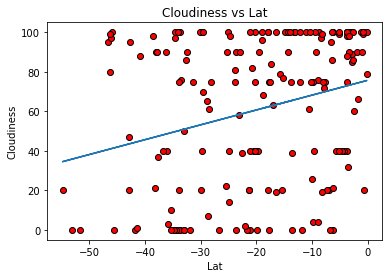

In [59]:
# Linear regression for Latitude vs. Cloudiness in Southern Hemisphere
x_axis = south_hem.groupby(south_hem["City"])["Lat"].mean()
y_axis = south_hem.groupby(south_hem["City"])["Cloudiness"].mean()

slope, int, r, p, std_err = st.linregress(x_axis, y_axis)
      
fit = slope * x_axis + int

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black")
plt.title("Cloudiness vs Lat")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.plot(x_axis,fit,"-")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

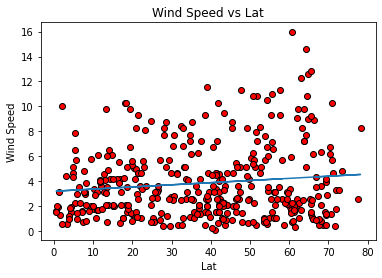

In [60]:
# Linear regression for Latitude vs. Wind Speed in Northern Hemisphere
x_axis = north_hem.groupby(north_hem["City"])["Lat"].mean()
y_axis = north_hem.groupby(north_hem["City"])["Wind Speed"].mean()

slope, int, r, p, std_err = st.linregress(x_axis, y_axis)
      
fit = slope * x_axis + int

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black")
plt.title("Wind Speed vs Lat")
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.plot(x_axis,fit,"-")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

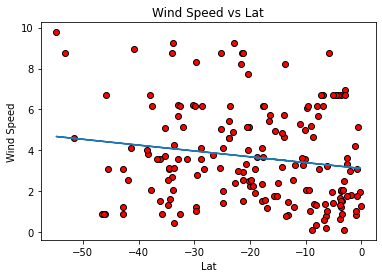

In [61]:
# Linear regression for Latitude vs. Wind Speed in Southern Hemisphere
x_axis = south_hem.groupby(south_hem["City"])["Lat"].mean()
y_axis = south_hem.groupby(south_hem["City"])["Wind Speed"].mean()

slope, int, r, p, std_err = st.linregress(x_axis, y_axis)
      
fit = slope * x_axis + int

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black")
plt.title("Wind Speed vs Lat")
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.plot(x_axis,fit,"-")

plt.show()